<a href="https://colab.research.google.com/github/durg3sh10/Humidity_prediction_Decision-Trees/blob/main/Humidity_prediction_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is a Decision Tree?

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.


The file **daily_weather.csv** is a comma-separated file that contains weather data.    The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

##Problem Statement :

##Use morning sensor signals as features to predict whether the humidity will be high at 3pm.


In [1]:
# Importing the libraries
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Read the data of the weather from the csv file using read_csv function of pandas dataframe.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
weather_df = pd.read_csv("/content/drive/MyDrive/Data science/Alma Better/Machine learning/Decision Trees/Data/Copy of daily_weather.csv")

In [4]:
weather_df.head(2)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0


In [5]:
weather_df.shape

(1095, 10)

In [6]:
weather_df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

Now lets check the data types of our dependent and independent variable

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [8]:
weather_df["high_humidity_3pm"].value_counts()

0    548
1    547
Name: high_humidity_3pm, dtype: int64

# Exploratory Data Analysis


It is necessary to determine whether the data we are using has duplicated rows. We are going to identify duplicate rows and remove the duplicate rows.

In [9]:
duplicate_rows = weather_df[weather_df.duplicated()]
duplicate_rows.shape

(1, 10)

In [10]:
weather_df = weather_df.drop_duplicates()

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [11]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in weather_df.columns if weather_df[feature].isnull().sum()>1]
features_with_null_values

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am']

In [12]:
weather_df = weather_df.dropna()

In [13]:
dependent_variable = 'high_humidity_3pm'

In [14]:
independent_variables = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

Divide data into independent variables('x'), Dependent variable('y') based on the problem statement.

In [15]:
x = weather_df[independent_variables]

In [16]:
y = weather_df[dependent_variable]

####Train - Test Split :
Separating data into training and testing sets is an important part of evaluating data mining models

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(351, 9)
(712, 9)
(351,)
(712,)


# Decision Trees Implementation

In [18]:
humidty_classifier = DecisionTreeClassifier()
humidty_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Predict on Test Set

In [19]:
y_predict = humidty_classifier.predict(x_test)

In [20]:
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [21]:
y_test.values

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

### Measure Accuracy of the Classifier

In [22]:
accuracy_score(y_test, y_predict)

0.8917378917378918

### Visulaizing Decision Tree

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

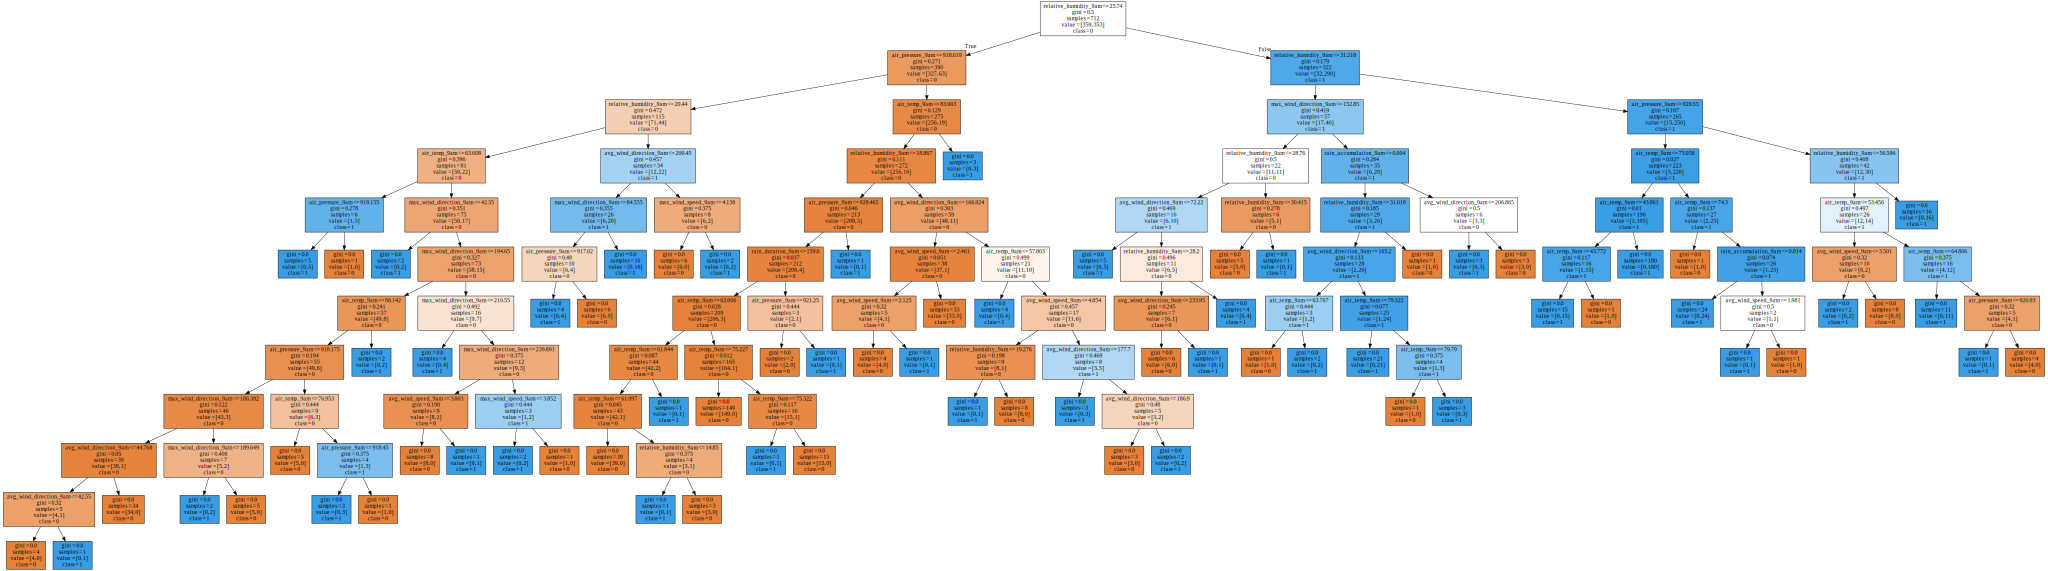

In [24]:
graph = Source(tree.export_graphviz(humidty_classifier, out_file=None, feature_names= x_train.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

### Advantages
<b>Easy to Understand:</b> Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.


<b>Useful in Data exploration: </b> Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
</b>Less data cleaning required:</b> It requires less data cleaning compared to some other modeling techniques. <b>It is not influenced by outliers and missing values to a fair degree.</b>


<b>Non Parametric Method:</b> Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

### <b>Disadvantages</b>


<b>Over fitting:</b> Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.